In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
#Image(filename=r"C:\Users\ArnonSongmoolnak\OneDrive - Suranaree University of Technology\My Thesis\Plot\scheme.png")

The trigger system consist of 3 parts. The graphical user interface is written in python. It can config frequency of trigger and turn on/off the trigger signal. The second part is microcontroller that recieve the serial data from GUI then send those data to FPGA by accessing data address. The final part is FPGA. It receive data from microcontroller then generate trigger signal by using clock devider logic to the FPGA default clock as a speed of 100MHz. To set the FPGA ready to generate trigger signal, the trigger controller send a bit to microcontroller, then the microcontroller will turn off write flag and turn on the FPGA. The FPGA dosen't generate a signal without the signal from photo detector. The trigger signal will be sent to the first sensor and the rest as the figure shown.

The maximum speed of FPGA clock PIN is 100MHz but DAQ of sensor can only operate around 9.5 kHz. Demonstrating only the maximum trigger frequency would be a point for obtaining high efficiency of the track reconstruction. In this work we also measure the hitmap of varius range in frequency.

In [3]:
def my_lines(ax, pos, *args, **kwargs):
    times = [f"$t_{{{i}}}$" for i in range(len(pos))]
    if ax == 'x':
        for p, t in zip(pos, times):
            plt.text(p - 0.1, 4.1, t, fontsize=22)
            plt.axvline(p, *args, **kwargs)
    else:
        for p in pos:
            plt.axhline(p, *args, **kwargs)

78


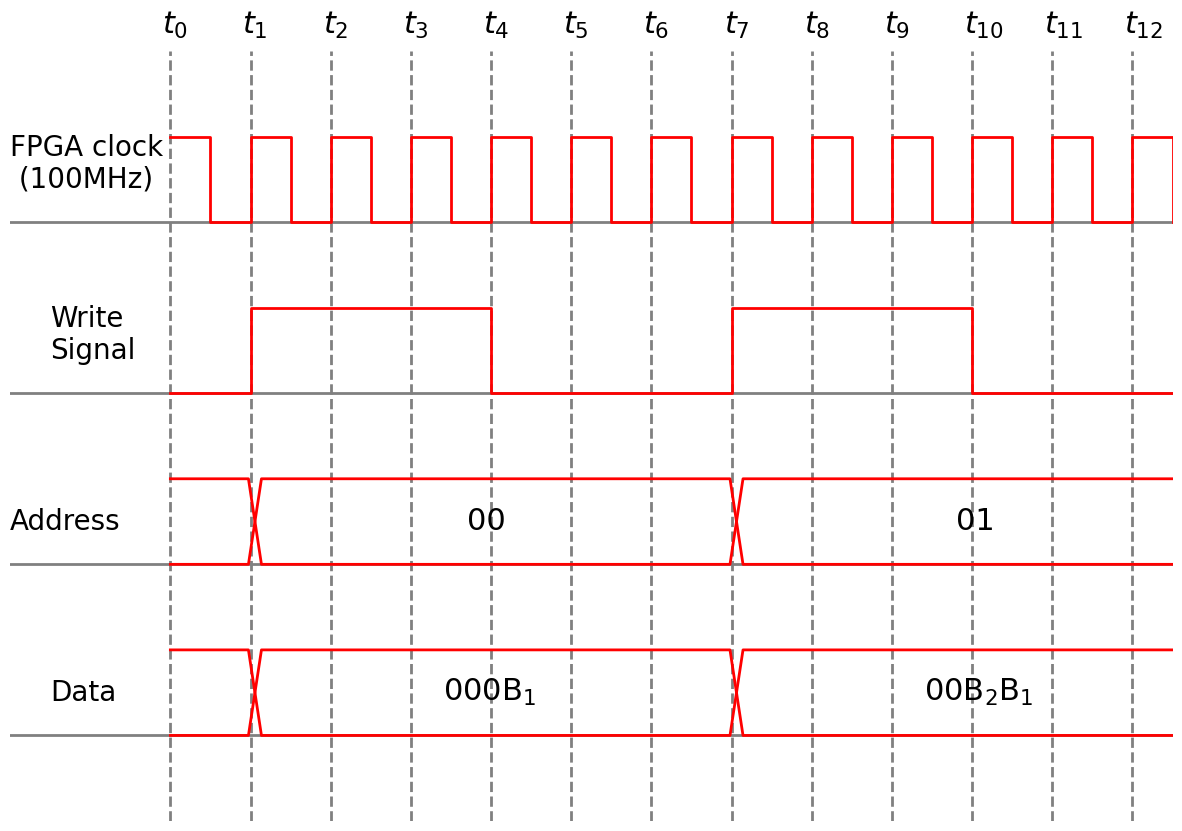

In [4]:
plt.figure(figsize=(15, 10))
bits = [i/2 for i in [0,1,1,1,0,0,0,1,1,1,0,0,0]]
wrt = np.repeat(bits, 2)
clock = (1 - np.arange(len(wrt)) % 2)/2
addr = np.array([0]*7 + [0.5]*37 + [0]*34)
addr2 = np.array([0.5]*7 + [0]*37 + [0.5]*34)
manchester = (1 - np.logical_xor(clock, wrt))/2
t = 0.5 * np.arange(len(wrt))
tt = np.linspace(0, max(t), len(t)*3)
print(len(tt))

my_lines('x', range(13), color='.5', linewidth=2, ls='--')
my_lines('y', [0, 1, 2, 3], color='.5', linewidth=2)
plt.step(t, clock + 3, 'r', linewidth = 2, where='post')
plt.step(t, wrt + 2, 'r', linewidth = 2, where='post')
plt.plot(tt, addr + 1, 'r', linewidth = 2)
plt.plot(tt, addr2 + 1, 'r', linewidth = 2)
plt.plot(tt, addr + 0, 'r', linewidth = 2)
plt.plot(tt, addr2 + 0, 'r', linewidth = 2)

plt.text(-2, 3.2, "FPGA clock \n (100MHz)", fontsize=20)
plt.text(-1.5, 2.2, "Write\nSignal", fontsize=20)
plt.text(-2, 1.2, "Address", fontsize=20)
plt.text(-1.5, 0.2, "Data", fontsize=20)

plt.text(3.7, 1.2, "00", fontsize=22)
plt.text(9.8, 1.2, "01", fontsize=22)
plt.text(3.4, 0.2, f"000B$_{1}$", fontsize=22)
plt.text(9.4, 0.2, f"00B$_{2}$B$_{1}$", fontsize=22)
# plt.step(t, manchester + 1, 'r', linewidth = 2, where='post')
plt.ylim([-0.5,4])
plt.xlim([-2,max(t)])

plt.gca().axis('off')
# plt.tight_layout(h_pad=10)
# plt.margins(10, 10)
plt.show()

The 4 bytes will be stored in FPGA buffer. Each byte are stored in every on signal in write flag. In the figure $t_1$ is the first time of writing data to FPGA buffer. The second writing is in $t_7$ and the address is increased to store a new byte to higher address in buffer. The duration time between closest posedge of write signal is determined from the delay of microcontroller. The address is increased every posedge of write signal. The write operation stops when the switch that send from microcontroller is on. A byte data are stored dependenly to the address that microcontroller send to FPGA.

In [5]:
10e7/9.5e3

10526.315789473685

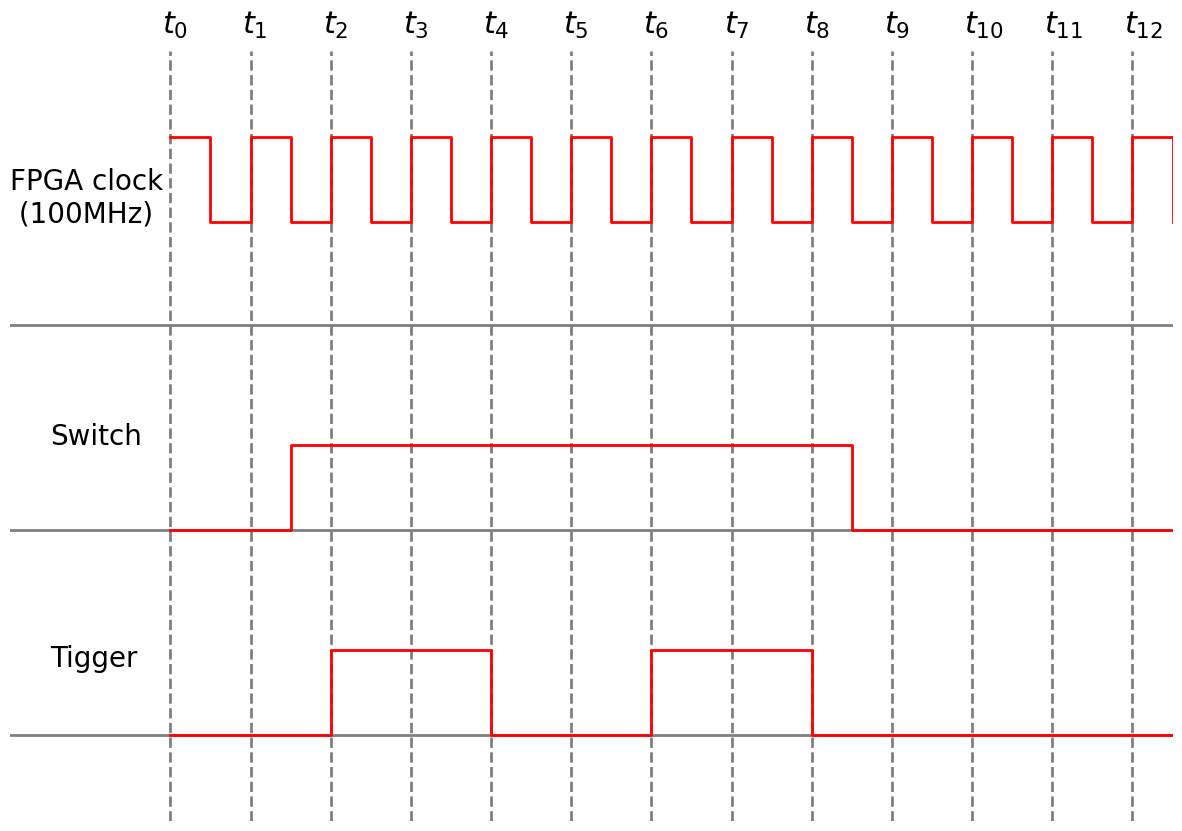

In [40]:
plt.figure(figsize=(15, 10))
bits2 = [i/2 for i in [0,0,1,1,1,1,1,1,1,0,0,0,0]]
wrt2 = np.repeat(bits2, 2)
bits3 = [i/2 for i in [0,0,0,1,1,0,0,1,1,0,0,0,0]]
trgg3 = np.repeat(bits3, 2)
swt = np.array([0]*1 + [0.5]*(len(wrt) - 1))
my_lines('x', range(13), color='.5', linewidth=2, ls='--')
my_lines('y', [0, 1.2, 2.4], color='.5', linewidth=2)
diode = np.array(list(wrt2))
plt.step(t, clock + 2.4, 'r', linewidth = 2, where='post')
# plt.step(t, swt + 2, 'r', linewidth = 2, where='post')
plt.step(t, diode + 1.2, 'r', linewidth = 2)
plt.step(list((np.array(t)-0.5))[1:] + [t[-1]],  list(trgg3)[1:] + [0], 'r', linewidth = 2)

plt.text(-2, 3.0, "FPGA clock \n (100MHz)", fontsize=20)
# plt.text(-1.5, 2.2, "Switch", fontsize=20)
plt.text(-1.5, 1.7, "Switch", fontsize=20)
plt.text(-1.5, 0.4, "Tigger", fontsize=20)

# plt.step(t, manchester + 1, 'r', linewidth = 2, where='post')
plt.ylim([-0.5,4])
plt.xlim([-2,max(t)])

plt.gca().axis('off')
# plt.tight_layout(h_pad=10)
# plt.margins(10, 10)
plt.show()

To generate the trigger signal the posedge of FPGA clock have to be in the HIGH position of both photo diode and switch signals. The switch signal send from the GUI in computer to FPGA through microcontroller. The first HIGH of diode signal that occurs in the HIGH trigger signal is used. The rest of diode signal has no effect on the trigger for preventing the fluctuation from proton beam which is detected by photo diode. The trigger system send square wave to DAQ of a APIDE sensor and the EUDAQ software can extract the event from trigger signal for obtaining individual proton hits.